In [2]:
# 선형회귀
# 연속형 변수일 경우, 목표변수 예측이 목적
# 연속된 변수를 예측하는 최적의 직선을 찾는 알고리즘.
# 예측할 종속변수만 연속변수이면 되며, 예측하는데 쓰일 그 외 변수들은 연속형일 필요는 없음.
# 머신러닝의 기초 알고리즘
# 복잡한 알고리즘에 비해 예측력이 떨어지지만, 데이터의 트겅이 복잡하지 않을 때는 쉽고 빠르기 때문에 많이 사용됨.
# 다른 모델과 성능을 비교하는 기준 모델로 사용하기도 함.

In [3]:
# 1. 데이터 수집
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 소수자릿수 정제
pd.options.display.float_format = '{:.2f}'.format

In [5]:
file_name = 'insurance.csv'
file_url = f"https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/{file_name}"
df = pd.read_csv(file_url)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.80,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.90,0,no,northwest,3866.86


In [6]:
# 결측치 없음.
# object(sex, smoker, region)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# 편차는 
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


In [8]:
# 2. 데이터 전처리
# 범주형 변수 처리
# sex, smoker, region
# smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
# smoker은 2개 종류.
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

In [10]:
df['smoker'].unique()

array([1, 0])

In [11]:
# 나머지 sex, region은 pd.get_dummies로 처리
# 고유값을 덜어서 부하를 줄이기 위해 drop_first
df = pd.get_dummies(df, columns = ['sex', 'region'], drop_first = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   expenses          1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB


In [13]:
# 3. 모델 학습
# 독립변수와 종속변수, 데이터셋 나누기
X = df[['age','bmi','children','smoker','sex_male','region_northwest','region_southeast','region_southwest']]
y = df['expenses']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 100
)

# 모델링
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# model fit(train set)
model.fit(X_train, y_train)# 학습셋, 독립변수, 종속변수

# 모델 예측
pred = model.predict(X_test)


In [14]:
# 4. 모델 평가
# 두 데이터를 비교하여 정확도 확인
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})
comparison

,actual,pred
12,1826.84,4331.00
306,20177.67,4432.63
318,7421.19,8450.53
815,1877.93,2822.16
157,15518.18,24753.08
...,...,...
713,1984.45,6557.66
1282,14283.46,23649.64
531,14043.48,14879.04
537,8825.09,10021.48


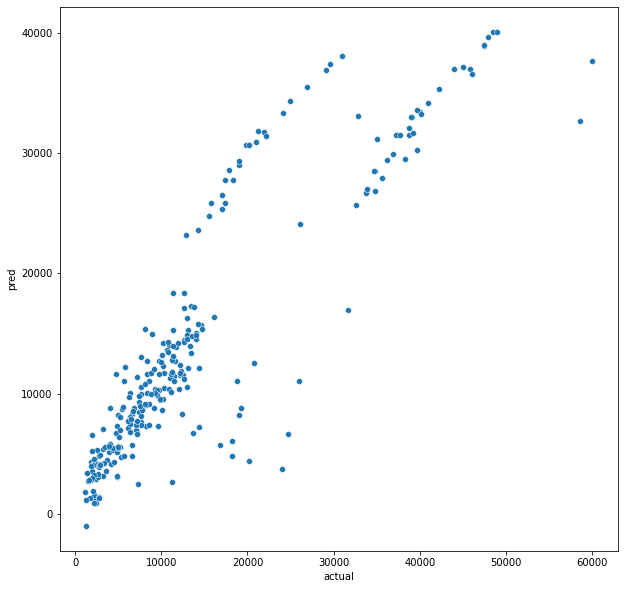

In [15]:
# 비교가 잘 되지 않으므로
# 산점도 그려서 비교
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)
# 양의 상관관계?

In [16]:
# RMSE & R2(결정계수)
# MAE 평균 절대 오차 : 실제값과 예측값 사이의 오차에 절댓값을 씌운 뒤 이에 대한 평균을 계산, 0에 가까울수록 좋음
# MSE 평균 제곱 오차 : 실제값과 예측값 사이의 오차를 제곱한 뒤 이에 대한 평균을 계산, 0에 가까울수록 좋음
# RMSE 루트 평균 제곱 오차 : MSE에 루트를 씌운 값, 연속형 변수를 예측할 때 가장 일반적으로 사용되는 평가지표, 0에 가까울수록 좋음
# R2 : 결정계수, 독립변수가 종속변수를 얼마만큼 설명해주는지 나타내는 지표, 즉 설명력, 1에 가까울수록 좋음

In [17]:

from sklearn.metrics import mean_squared_error

In [19]:
# SST : 총 변동
# SSR : 설명 가능한 변동
# 모델이 얼마나 값의 변동을 잘 설명하는가? = 예측을 잘 하는가.
model.score(X_train,y_train)

0.7380843471816282

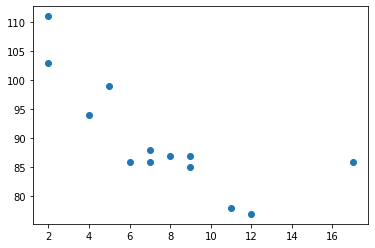

In [20]:
# 선형회귀(Linear Regression)
# - 독립변수와 종속변수 간에 선형 관계가 있음을 가정하여 최적의 선을 그려서 예측하는 방법
# - 머신러닝에서는 손실 함수 Loss Function를 최소화하는 선을 찾아서 모델을 만들어냄
# - 수식을 도출하기 매우 쉽기 때문에 그 해석도 매우 직관적
import matplotlib.pyplot as pyplot
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

-1.7512877115526118 103.10596026490066


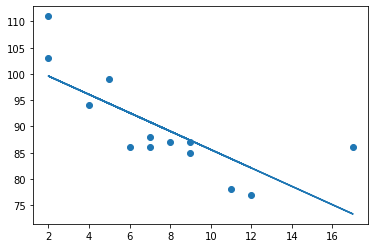

In [21]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope, intercept)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [22]:
# y절편 확인
model.intercept_

-11353.689780589895

In [ ]:
# 유의할 점
# - 모델 계수를 해석할 때 부호의 영향에 유의
# - 부호와 상관없이 계수의 절대값이 클수록 영향이 크다고 할 수 있고, 절댓값이 0에 가까울수록 영향력이 거의 없음
# - 다만, 여러 계수를 서로 비교할 때 단순히 절댓값이 더 크면 영향이 더 크다고 보기에는 무리가 있음 -> 각 변수의 스케일이 다르기 때문
#   ex) 성별은 0과 1로만 되어있는 반면, 나이는 20부터 60등 십의 자리 숫자를 가지고 있음. 즉, 성별이 1 커질때와 나이가 1 커질때가 지니는 영향력이 다르다는 것
# - 이 부분을 명료하게 비교하려면 스케일링 작업이 필요.

In [23]:
# 관련 모델
def score_model(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "RMSE" : mean_squared_error(y_test, pred, squared=False),
        "R²": model.score(X_test, y_test)
    }

In [24]:
score_model(LinearRegression())

{'RMSE': 5673.925913666443, 'R²': 0.7946953084832674}

In [25]:
# 릿지 회귀
# 선형 회귀 모델에 L2 정규화를 적용시킨 모델
# 오버피팅을 억제하는 효과
from sklearn.linear_model import Ridge
score_model(Ridge())

{'RMSE': 5681.410468798602, 'R²': 0.794153310652963}

In [26]:
# 라쏘 회귀
# 선형 회귀 모델에 L1 정규화를 적용시킨 모델
# 피처 셀렉션 및 오버피팅을 억제하는 효과
from sklearn.linear_model import Lasso
score_model(Lasso())

{'RMSE': 5674.103332369841, 'R²': 0.7946824688860602}

In [27]:
# 엘라스틱 넷(Elastic Net)
# 릿지 회귀와 라쏘 회귀의 단점을 절충
from sklearn.linear_model import ElasticNet
score_model(ElasticNet())

{'RMSE': 10009.085416144599, 'R²': 0.3611184549032317}

In [28]:
# 5. 배포
!pip install mlxtend --quiet
import joblib
joblib.dump(model, 'first_model.pkl') 

['first_model.pkl']

In [29]:
# MLOps 진행하면서 점차 최적화

In [30]:
# 로지스틱 회귀 : 타이타닉 생존자 예측하기

In [34]:
file_url = "https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/"
# 맨 첫째줄 PassengerId를 index열로 지정
train = pd.read_csv(f'{file_url}/titanic_train.csv', index_col=0)
test = pd.read_csv(f'{file_url}/titanic_test.csv', index_col=0)

In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [35]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [36]:
# 데이터가 가지고 있는 변수 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [37]:
# 종속변수 : Survived
# 통계 정보 출력
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [38]:
# Object 통계 정보
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [39]:
### 상관관계 파악
train.corr()
# 상관관계 강도 해석 (절댓값)
# 0.2 이하 : 상관관계가 거의 없음
# 0.2 ~ 0.4 : 낮은 상관관계
# 0.4 ~ 0.6 : 중간 상관관계
# 0.6 ~ 0.8 : 높은 상관관계
# 0.8 이상 : 매우 높은 상관관계 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.10,0.16,0.22,1.00


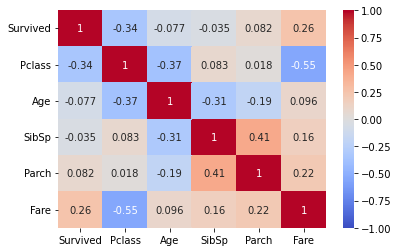

In [41]:
# sns.heatmap()
sns.heatmap(train.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [42]:
# 전처리(결측치 처리)
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [44]:
# S 비중이 높음, 결측치 2개는 큰 차이 없을듯 하여 채움처리.
train.Embarked = train.Embarked.fillna("S")
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [45]:
# 나이는 호칭에서 추출하여 결측치 메꿈.
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.')
train['Title'].value_counts(), train['Title'].unique()

(Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Mlle          2
 Major         2
 Col           2
 Countess      1
 Capt          1
 Ms            1
 Sir           1
 Lady          1
 Mme           1
 Don           1
 Jonkheer      1
 Name: Title, dtype: int64,
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
        'Jonkheer'], dtype=object))

In [46]:
rarelist = []
for a in set(train['Title']):
    if list(train['Title']).count(a) < 10:
        rarelist.append(a)
rarelist

['Ms',
 'Capt',
 'Mlle',
 'Don',
 'Dr',
 'Lady',
 'Jonkheer',
 'Major',
 'Mme',
 'Countess',
 'Sir',
 'Col',
 'Rev']

In [47]:
train['Title'] = train['Title'].replace(rarelist, 'Rare')
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [48]:
# 평균나이를 활용하여 호칭에 맞춰 배치
title_age_mean = train.groupby(['Title'])['Age'].mean()
title_age_mean

Title
Master    4.57
Miss     21.77
Mr       32.37
Mrs      35.90
Rare     42.38
Name: Age, dtype: float64

In [49]:
for v in train['Title'].unique():
    train.loc[train.Age.isnull() & (train.Title == v), 'Age'] = title_age_mean[v]

In [50]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

In [51]:
# 유의미한 차이를 보기 힘든 값들 drop
train_df = train.drop(columns=['Name', 'Ticket', 'Title', 'Cabin'])
train_df # 891 rows × 8 columns

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.00,1,0,7.25,S
2,1,1,female,38.00,1,0,71.28,C
3,1,3,female,26.00,0,0,7.92,S
4,1,1,female,35.00,1,0,53.10,S
5,0,3,male,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.00,0,0,13.00,S
888,1,1,female,19.00,0,0,30.00,S
889,0,3,female,21.77,1,2,23.45,S


In [52]:
# 범주형 변수 변환
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [53]:
train_df = pd.get_dummies(train_df, columns = ['Sex', 'Embarked'], drop_first=True)
train_df # 891 rows × 9 columns

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.00,1,0,7.25,1,0,1
2,1,1,38.00,1,0,71.28,0,0,0
3,1,3,26.00,0,0,7.92,0,0,1
4,1,1,35.00,1,0,53.10,0,0,1
5,0,3,35.00,0,0,8.05,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.00,0,0,13.00,1,0,1
888,1,1,19.00,0,0,30.00,0,0,1
889,0,3,21.77,1,2,23.45,0,0,1


In [54]:
# 상위 전처리 과정을 함수화
def pre_processing(df : pd.DataFrame):
    df.Embarked = df.Embarked.fillna("S")
    df.Fare = df.Fare.fillna(0)
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
    rarelist = [a for a in set(df['Title'])
                if list(df['Title']).count(a) < 10]
    df['Title'] = df['Title'].replace(rarelist, 'Rare')
    title_age_mean = df.groupby(['Title'])['Age'].mean()
    for v in df['Title'].unique():
        df.loc[df.Age.isnull() & (df.Title == v), 'Age'] = title_age_mean[v]
    df_clean = df.drop(columns=['Name', 'Ticket', 'Title', 'Cabin'])
    return pd.get_dummies(df_clean,
                          columns = ['Sex', 'Embarked'], drop_first=True)

In [55]:
# 모델링
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split

# 범주형 변수 X , 종속 변수 y
X, y = (train_df.drop(columns=['Survived']), train_df['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [56]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [61]:
# 예측 : accuracy_score
# 정확도 : 예측값과 실젯값을 비교하여 얼마나 맞추었는지 확인
model.coef_

array([[-1.12697841, -0.04534381, -0.30923645, -0.22977453,  0.00318319,
        -2.54554844,  0.03374822, -0.09098989]])

In [63]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.1270
Age          -0.0453
SibSp        -0.3092
Parch        -0.2298
Fare          0.0032
Sex_male     -2.5455
Embarked_Q    0.0337
Embarked_S   -0.0910
dtype: float64

In [64]:
# 이해
# 피처 엔지니어링
# - 기존 데이터를 손보아 더 나은 변수를 만드는 기법
#   ex) 더미 변수
# - 도메인 지식의 활용이 중요
#   1) 데이터에 사전 지식이 있으면 어떤 변수를 어떻게 바꾸면 더 나은 피처를 얻을 수 있을지 파악 가능
#   2) 도메인 지식을 바탕으로 정확한 목적을 가지고 수행하는 피처 엔지니어링이 더욱 효율적

# 다중공선성 문제
# - 선형 회귀 분석, 로지스틱 회귀 분석 등 선형 모델에서 독립변수 사이에 상관관계가 높을 때에 발생하는 문제
# - 특정 독립변수 간의 상관관계가 매우 높다면 종속변수의 변화 요인이 정확히 어떤 변수 때문인지 불투명해짐
# - 선형 모델은 독립변수 간의 독립성을 전제로 하기 때문에, 다중공선성 문제를 해결해주는 것이 좋음

# 해결책
# - 상관관계가 높은 변수 중 하나를 제거
# - 둘을 모두 포괄시키는 새로운 변수 생성
# - PCA 등의 방법으로 차원 축소를 수행(주성분 분석)??

In [65]:
#SibSp & Parch → Family 변수로 변경
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family
PassengerId,,,,,,,,
1,0,3,22.0000,7.2500,1,0,1,1
2,1,1,38.0000,71.2833,0,0,0,1
3,1,3,26.0000,7.9250,0,0,1,0
4,1,1,35.0000,53.1000,0,0,1,1
5,0,3,35.0000,8.0500,1,0,1,0


In [66]:
X, y = (train_df.drop(columns=['Survived']),
                    train_df['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 100)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
pred = model2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [67]:
pd.Series(model2.coef_[0], index = X.columns)

Pclass       -1.1031
Age          -0.0433
Fare          0.0026
Sex_male     -2.6238
Embarked_Q   -0.1382
Embarked_S   -0.3709
Family       -0.2219
dtype: float64

In [68]:
# 로지스틱 회귀
# - 로지스틱 함수를 사용하여 선형 회귀 분서의 직선 형태를 1과 0에 한없이 가까워지는 곡선 형태로 바꿔줌
# - 기본적으로 0.5를 기준으로 1과 0으로 변환시킨 값을 보여줌

In [69]:
# KNN, 와인 등급(종속데이터), 별 각종 범주형 데이터
file_url = 'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/wine.csv'
df = pd.read_csv(file_url)
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065
1,1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050
2,1,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185
3,1,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480
4,1,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735


In [70]:
# 결측치, 타입확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [71]:
# 결측치 없음, 타입확인 전부 실수형
# 데이터 통계정보
df.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,1680.0000


In [72]:
# 이상치 : Color_Intesity 2배이상 증가.
# 종속변수 확인
df.Class.unique()

array([1, 2, 3])

In [73]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [74]:
# KNN 알고리즘 : 새로운 데이터를 예측할 때, 거리를 기반으로 하여 인접한 데이터와 같은 종류로 분류
# 변수의 스케일 간의 격차가 클 경우, 산출되는 거리값이 왜곡될 수 있음.
# 거리가 동점일 경우
# - 사이킷런 : 랜덤으로 분류함
# - n을 홀수로 하면 동점을 근본적으로 막을 수 있음
# - 그럼에도 짝수를 써야한다면 weights를 통해 가중치를 줌.


# 전처리 : 스케일링
# - 데이터의 스케일을 맞추는 작업
# - K-최근접 이웃은 거리 기반의 알고리즘이기 때문에 이러한 스케일 차이는 결과를 왜곡할 수 있음
# - 스케일링은 이러한 문제를 해결하기 위해 인위적으로 각 컬럼(변수)이 비슷한 범위를 가지도록 만드느 작업
# - 데이터를 동등한 수준에서 연산하게 함

# 스케일링 종류
# 표준화 스케일링 : 평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용
# 로버스트 스케일링 : 데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용
# 최소-최대 스케일링 : 데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
# 정규화 스케일링 : 행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

# 스케일링 방식 기준
# 아웃라이어의 유무 : 아웃라이어 영향이 클 시 로버스트 스케일링이 적합
# 데이터의 기준 분포를 최대한 유지해야 할 시 : 최소-최대 스케일링
# 기존 데이터가 정규분포를 따르고 있고 아웃라이어가 없는 상황 : 표준화 스케일링

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [76]:
# 1. 표준화 스케일링
st_scaler = StandardScaler()
st_scaler.fit(df)
# 스케일러가 fit()을 통해 학습한 정보를 통해 데이터를 변환(스케일링)하게 하는 함수
st_scaled = st_scaler.transform(df)
df_st_scaled = pd.DataFrame(st_scaled, columns = df.columns)
df_st_scaled

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-1.2139,1.5186,-0.5622,0.2321,-1.1696,1.9139,0.8090,1.0348,-0.6596,1.2249,0.2517,0.3622,1.8479,1.0130
1,-1.2139,0.2463,-0.4994,-0.8280,-2.4908,0.0181,0.5686,0.7336,-0.8207,-0.5447,-0.2933,0.4061,1.1134,0.9652
2,-1.2139,0.1969,0.0212,1.1093,-0.2687,0.0884,0.8090,1.2155,-0.4984,2.1360,0.2690,0.3183,0.7886,1.3951
3,-1.2139,1.6915,-0.3468,0.4879,-0.8093,0.9309,2.4914,1.4665,-0.9819,1.0322,1.1861,-0.4275,1.1841,2.3346
4,-1.2139,0.2957,0.2277,1.8404,0.4519,1.2820,0.8090,0.6634,0.2268,0.4014,-0.3193,0.3622,0.4496,-0.0379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.3739,0.8763,2.9745,0.3052,0.3018,-0.3329,-0.9856,-1.4249,1.2743,-0.9302,1.1428,-1.3928,-1.2312,-0.0220
174,1.3739,0.4933,1.4126,0.4148,1.0525,0.1586,-0.7933,-1.2843,0.5491,-0.3170,0.9698,-1.1295,-1.4854,0.0099
175,1.3739,0.3328,1.7447,-0.3894,0.1517,1.4224,-1.1298,-1.3446,0.5491,-0.4221,2.2242,-1.6121,-1.4854,0.2806
176,1.3739,0.2092,0.2277,0.0127,0.1517,1.4224,-1.0337,-1.3546,1.3549,-0.2293,1.8349,-1.5683,-1.4007,0.2965


In [77]:
df_st_scaled.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028
min,-1.2139,-2.4342,-1.4330,-3.6792,-2.6710,-2.0883,-2.1072,-1.6960,-1.8682,-2.0690,-1.6343,-2.0947,-1.8951,-1.4932
25%,-1.2139,-0.7882,-0.6587,-0.5721,-0.6891,-0.8244,-0.8855,-0.8275,-0.7401,-0.5973,-0.7951,-0.7676,-0.9522,-0.7846
50%,0.0800,0.0610,-0.4231,-0.0238,0.0015,-0.1223,0.0960,0.1061,-0.1761,-0.0629,-0.1592,0.0331,0.2377,-0.2337
75%,1.3739,0.8361,0.6698,0.6981,0.6021,0.5096,0.8090,0.8491,0.6095,0.6292,0.4940,0.7132,0.7886,0.7582
max,1.3739,2.2598,3.1092,3.1563,3.1545,4.3714,2.5395,3.0628,2.4024,3.4851,3.4354,3.3017,1.9609,2.9715


In [79]:
df.describe()# 상단 표준화 통계와의 차이점.

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,1680.0000


In [80]:
# 로버스트 스케일링
rb_scaler = RobustScaler()
# fit + transform (한번에)
rb_scalded = rb_scaler.fit_transform(df)
df_rb_scaled = pd.DataFrame(rb_scalded, columns = df.columns)
df_rb_scaled.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0309,-0.0376,0.3185,0.0188,-0.0012,0.0917,-0.0566,-0.0633,0.1305,0.0513,0.1235,-0.0224,-0.1366,0.1515
std,0.3875,0.6174,0.7548,0.7895,0.7766,0.7517,0.5918,0.5981,0.7430,0.8177,0.7779,0.6772,0.5761,0.6500
min,-0.5000,-1.5361,-0.7601,-2.8777,-2.0698,-1.4737,-1.3002,-1.0749,-1.2537,-1.6357,-1.1443,-1.4370,-1.2252,-0.8163
25%,-0.5000,-0.5228,-0.1774,-0.4317,-0.5349,-0.5263,-0.5792,-0.5569,-0.4179,-0.4357,-0.4933,-0.5407,-0.6836,-0.3571
50%,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.5000,0.4772,0.8226,0.5683,0.4651,0.4737,0.4208,0.4431,0.5821,0.5643,0.5067,0.4593,0.3164,0.6429
max,0.5000,1.3536,2.6588,2.5036,2.4419,3.3684,1.4421,1.7635,1.9104,2.8929,2.7886,2.2074,0.9899,2.0774


In [81]:
# 최소-최대 스케일링
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(df)
df_mm_scaled = pd.DataFrame(mm_scaled, columns = df.columns)
df_mm_scaled.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,0.4691,0.5186,0.3155,0.5382,0.4585,0.3233,0.4535,0.3564,0.4375,0.3725,0.3224,0.3882,0.4915,0.3344
std,0.3875,0.2136,0.2208,0.1467,0.1721,0.1552,0.2158,0.2107,0.2348,0.1806,0.1978,0.1858,0.2601,0.2246
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.3507,0.1705,0.4545,0.3402,0.1957,0.2629,0.1825,0.2642,0.2650,0.1655,0.2459,0.2445,0.1587
50%,0.5000,0.5316,0.2223,0.5348,0.4588,0.3043,0.4741,0.3787,0.3962,0.3612,0.2910,0.3943,0.5531,0.2821
75%,1.0000,0.6967,0.4629,0.6404,0.5619,0.4022,0.6276,0.5348,0.5802,0.4858,0.4198,0.5203,0.6960,0.5043
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [82]:
# 스케일링 적용시 주의점
# - 스케일링 대상에서 종속변수를 제외
# - 스케일링 전 훈련셋과 시험셋을 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1),
    df.Class, test_size=0.2, random_state=100
)
# 데이터 특성 보존을 위해 최대-최소 스케일러 사용
mm_scaler = MinMaxScaler() # MinMaxScaler 클래스 -> 최대/최소 스케일링을 처리할 수 있는 '객체'
# 클래스를 통해 만들어진 변수와 함수의 묶음 : 객체
# 객체에 소속된 변수 : 프로퍼티
# 객체에 소속된 함수 : 메소드
X_train_scaled = mm_scaler.fit_transform(X_train) # fit을 통해 학습된 정보가 scaler 객체에 저장됨
X_test_scaled = mm_scaler.transform(X_test)

In [83]:
# 모델링 및 예측/평가

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8888888888888888

In [85]:
# 하이퍼 파라미터 튜닝
# KNeighborsClassifier : 분류 문제 알고리즘
# - n_neighbors = 5 : 예측에 참고할 이웃 수
# - weights = 'uniform' : 예측에 사용되는 가중치 함수로 기본값인 uniform은 모든 포인트에 동일한 가중치가 부여
# - metric = 'minkowski' : 거리측정 기준
# - n_jobs = None : 실행할 병렬 작업 수

# 알고리즘에 쓰이는 매개변수를 조정 = 하이퍼파라미터 튜닝

In [86]:
def tuning(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, pred)
    return score

In [87]:
scores = [(i, tuning(i)) for i in range(1, 21)]

In [88]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(13, 0.9722222222222222),
 (18, 0.9722222222222222),
 (20, 0.9722222222222222),
 (7, 0.9444444444444444),
 (11, 0.9444444444444444),
 (12, 0.9444444444444444),
 (14, 0.9444444444444444),
 (15, 0.9444444444444444),
 (16, 0.9444444444444444),
 (19, 0.9444444444444444),
 (1, 0.9166666666666666),
 (3, 0.9166666666666666),
 (4, 0.9166666666666666),
 (6, 0.9166666666666666),
 (8, 0.9166666666666666),
 (17, 0.9166666666666666),
 (5, 0.8888888888888888),
 (9, 0.8888888888888888),
 (10, 0.8888888888888888),
 (2, 0.8611111111111112)]

In [91]:
# NB(나이브 베이즈)
file_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt'
df = pd.read_csv(file_url, sep='\t', index_col=0)
df.head()

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [92]:
df.describe() 

,label
count,200000.0000
mean,0.5000
std,0.5000
min,0.0000
25%,0.0000
50%,0.5000
75%,1.0000
max,1.0000


In [93]:
# 결측값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [94]:
df[df.document.isnull()]

,document,label
id,,
6369843,NaN,1
511097,NaN,1
2172111,NaN,1
402110,NaN,1
5942978,NaN,0
5026896,NaN,0
1034280,NaN,0
1034283,NaN,0


In [96]:
# 결측값 제외한 데이터프레임 생성
df2 = df.dropna()

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     199992 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [102]:
# 데이터 분량이 너무 많으니 실습자료로 탑 다운 1000개씩 총 2000개 데이터로 분석 진행
df3 = pd.concat([df2.head(1000), df2.tail(1000)])
df3

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...
8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
3302770,쓰.레.기,0
5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0


In [100]:
!pip install konlpy --quiet

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 465 kB 60.9 MB/s 


In [103]:
from konlpy.tag import Okt
okt = Okt()
sample_text, okt.nouns(sample_text)

('어릴때보고 지금다시봐도 재밌어요ㅋㅋ', ['때', '보고', '지금', '다시'])

In [104]:
# 분석기 적용시킨 후 남은 문자모습.
df3['nouns'] = df3.document.apply(okt.nouns)

In [105]:
df3.nouns

id
8112052                                       [때, 보고, 지금, 다시]
8132799     [디자인, 학생, 외국, 디자이너, 그, 일군, 전통, 통해, 발전, 문화, 산업,...
4655635                          [폴리스스토리, 시리즈, 부터, 뉴, 하나, 최고]
9251303                           [연기, 진짜, 개, 생각, 몰입, 진짜, 영화]
10067386                                   [안개, 밤하늘, 초승달, 영화]
                                  ...                        
8963373                                             [포켓, 몬스터]
3302770                                                [레, 기]
5458175              [완전, 사이코, 영화, 마지막, 더욱더, 이, 영화, 질, 트, 린다]
6908648                                    [왜, 라따뚜이, 스머프, 런가]
8548411                                   [포, 저그, 영차, 영차, 영차]
Name: nouns, Length: 2000, dtype: object

In [106]:
# 각 단어의 위치
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df3.nouns.apply(" ".join))
cv.vocabulary_

{'보고': 1206,
 '지금': 2670,
 '다시': 551,
 '디자인': 722,
 '학생': 3120,
 '외국': 2059,
 '디자이너': 721,
 '일군': 2309,
 '전통': 2479,
 '통해': 2972,
 '발전': 1119,
 '문화': 1011,
 '산업': 1363,
 '사실': 1345,
 '우리나라': 2090,
 '시절': 1640,
 '열정': 1964,
 '노라노': 494,
 '사람': 1333,
 '폴리스스토리': 3067,
 '시리즈': 1628,
 '부터': 1266,
 '하나': 3098,
 '최고': 2814,
 '연기': 1945,
 '진짜': 2711,
 '생각': 1404,
 '몰입': 964,
 '영화': 1977,
 '안개': 1770,
 '밤하늘': 1124,
 '초승달': 2806,
 '사랑': 1336,
 '라면': 747,
 '처음': 2772,
 '완전': 2044,
 '감동': 52,
 '전쟁': 2475,
 '바보': 1067,
 '나이': 430,
 '훗날': 3280,
 '사하나': 1360,
 '감정': 62,
 '이해': 2273,
 '고질': 199,
 '오페라': 2024,
 '작품': 2381,
 '극단': 323,
 '갈림': 42,
 '반전': 1105,
 '평점': 3046,
 '긴장감': 374,
 '스릴': 1574,
 '전장': 2474,
 '공포': 219,
 '고시': 189,
 '소재': 1512,
 '관련': 236,
 '단연': 565,
 '가면': 10,
 '갈수록': 44,
 '더욱': 624,
 '밀회': 1061,
 '화이팅': 3243,
 '수작': 1549,
 '일본': 2315,
 '마음': 840,
 '임팩트': 2342,
 '일품': 2334,
 '제대로': 2541,
 '범죄': 1174,
 '스릴러': 1575,
 '마디': 827,
 '징텅': 2728,
 '교복': 249,
 '이의': 2256,
 '볼펜': 1241,
 '자국':

In [107]:
x = cv.transform(df3.nouns.apply(" ".join))
print(x)

  (0, 551)	1
  (0, 1206)	1
  (0, 2670)	1
  (1, 494)	1
  (1, 721)	1
  (1, 722)	1
  (1, 1011)	1
  (1, 1119)	1
  (1, 1333)	1
  (1, 1345)	1
  (1, 1363)	1
  (1, 1640)	1
  (1, 1964)	1
  (1, 2059)	1
  (1, 2090)	1
  (1, 2309)	1
  (1, 2479)	2
  (1, 2972)	1
  (1, 3120)	1
  (2, 1266)	1
  (2, 1628)	1
  (2, 2814)	1
  (2, 3067)	1
  (2, 3098)	1
  (3, 964)	1
  :	:
  (1990, 2499)	1
  (1990, 2892)	1
  (1990, 3046)	1
  (1991, 67)	1
  (1991, 435)	1
  (1991, 1957)	1
  (1991, 1977)	1
  (1991, 2347)	1
  (1992, 2947)	1
  (1993, 1990)	1
  (1994, 102)	1
  (1994, 1202)	1
  (1995, 963)	1
  (1995, 3057)	1
  (1997, 625)	1
  (1997, 819)	1
  (1997, 847)	1
  (1997, 1353)	1
  (1997, 1977)	2
  (1997, 2044)	1
  (1998, 746)	1
  (1998, 766)	1
  (1998, 1578)	1
  (1999, 1976)	3
  (1999, 2447)	1


In [108]:
# 훈련, 테스트 데이터 나누기.
from sklearn.model_selection import train_test_split

y = df3.label
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [109]:
# 모델에 훈련, 예측값
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [110]:
# 정확도 테스트
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, pred)

0.662

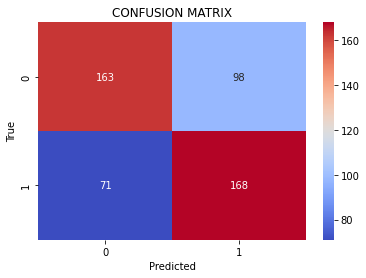

In [111]:
# 시각화 진행
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, pred), cmap='coolwarm', annot=True, fmt='.0f')
plt.title("CONFUSION MATRIX")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [113]:
# 결정 트리
file_url = 'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/salary.csv'
df = pd.read_csv(file_url, skipinitialspace=True)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [114]:
# 미국의 다양한 독립변수별 연봉
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [115]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.0000,48842.0000,48842.0000,48842.0000,48842.0000
mean,38.6436,10.0781,1079.0676,87.5023,40.4224
std,13.7105,2.5710,7452.0191,403.0046,12.3914
min,17.0000,1.0000,0.0000,0.0000,1.0000
25%,28.0000,9.0000,0.0000,0.0000,40.0000
50%,37.0000,10.0000,0.0000,0.0000,40.0000
75%,48.0000,12.0000,0.0000,0.0000,45.0000
max,90.0000,16.0000,99999.0000,4356.0000,99.0000


In [116]:
# 일단 class 이진화 시작.
# 저연봉자 : 5만달러 이하 / 고연봉자 : 5만달러 초과
df['class'] = df['class'].map({'<=50K': 0, '>50K': 1})
df['class']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [117]:
# 데이터타입이 object인 컬럼만 모아서 리스트화
obj_list = [c for c in df.columns if df[c].dtype == 'object']
print(obj_list)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [118]:
# 케이스를 확인.
for o in obj_list:
    print(o, df[o].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [119]:
# 값의 종류가 10개 이상인 케이스만 분류하여 처리할 예정
for o in obj_list:
    if df[o].nunique() > 10:
        print(o, df[o].nunique())

education 16
occupation 14
native-country 41


In [120]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [121]:
df['education-num']

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: education-num, Length: 48842, dtype: int64

In [122]:
# 확인결과 Education-num 이 학력을 나타내는 숫자, education은 문자로 매칭되는것을 확인
for n in range(1, 17): # 1~16
    print(f"{n} : ", df[df['education-num'] == n]['education'].unique())

1 :  ['Preschool']
2 :  ['1st-4th']
3 :  ['5th-6th']
4 :  ['7th-8th']
5 :  ['9th']
6 :  ['10th']
7 :  ['11th']
8 :  ['12th']
9 :  ['HS-grad']
10 :  ['Some-college']
11 :  ['Assoc-voc']
12 :  ['Assoc-acdm']
13 :  ['Bachelors']
14 :  ['Masters']
15 :  ['Prof-school']
16 :  ['Doctorate']


In [123]:
# 중복되는 값이므로 드랍
df.drop('education', axis=1, inplace=True)

In [124]:
# 데이터 이미 묶여있고, 직업이라는 데이터 특성상 연봉 큰 영향 예상
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [125]:
# 데이터 이미 묶여있고, 직업이라는 데이터 특성상 연봉 큰 영향 예상
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [126]:
 # 나머지를 다루기도 애매한 숫자이므로 해당 국가별 연봉이라는 타이틀을 하나 만들어서 실수형으로 대체.
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [127]:
df.groupby('native-country')['class'].mean().sort_values(ascending=False)

native-country
France                       0.4211
India                        0.4106
Taiwan                       0.4000
Iran                         0.3729
England                      0.3701
Greece                       0.3673
Yugoslavia                   0.3478
Japan                        0.3478
Canada                       0.3462
Italy                        0.3238
Cambodia                     0.3214
Hungary                      0.3158
Ireland                      0.2973
China                        0.2951
Philippines                  0.2881
Germany                      0.2816
Hong                         0.2667
Cuba                         0.2464
United-States                0.2440
Poland                       0.1954
Portugal                     0.1791
South                        0.1739
Thailand                     0.1667
Scotland                     0.1429
Jamaica                      0.1415
Ecuador                      0.1333
Haiti                        0.1200
Puerto-Rico  

In [128]:
country_group = df.groupby('native-country').mean()['class']
country_group

native-country
Cambodia                     0.3214
Canada                       0.3462
China                        0.2951
Columbia                     0.0471
Cuba                         0.2464
Dominican-Republic           0.0485
Ecuador                      0.1333
El-Salvador                  0.0710
England                      0.3701
France                       0.4211
Germany                      0.2816
Greece                       0.3673
Guatemala                    0.0341
Haiti                        0.1200
Holand-Netherlands           0.0000
Honduras                     0.1000
Hong                         0.2667
Hungary                      0.3158
India                        0.4106
Iran                         0.3729
Ireland                      0.2973
Italy                        0.3238
Jamaica                      0.1415
Japan                        0.3478
Laos                         0.0870
Mexico                       0.0494
Nicaragua                    0.0612
Outlying-US(G

In [129]:
country_group.index

Index(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
       'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece',
       'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong',
       'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South',
       'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'],
      dtype='object', name='native-country')

In [130]:
# 국가별 소득수준으로 정리 완료
country_group = country_group.reset_index()
country_group

,native-country,class
0,Cambodia,0.3214
1,Canada,0.3462
2,China,0.2951
3,Columbia,0.0471
4,Cuba,0.2464
5,Dominican-Republic,0.0485
6,Ecuador,0.1333
7,El-Salvador,0.0710
8,England,0.3701
9,France,0.4211


In [131]:
# A.merge(B, on=[기준이되는것]) A 왼쪽, B 오른쪽
# 집합으로 생각하는게 편함.
# A와 B를 두고 원 두개의 집합표를 생각하고
# left일때 A를 모두 포함하는 집합
df = df.merge(country_group, on = 'native-country', how='left')
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.2440
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.2440
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.2440
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.2440
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.2440
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.2440
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.2440
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.2440


In [132]:
df.drop('native-country', axis=1, inplace=True)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.2440
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.2440
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.2440
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.2440
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.2440
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.2440
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.2440
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.2440


In [133]:
df = df.rename(columns={'class_x': 'class', 'class_y': 'native-country'})
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.2440
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.2440
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.2440
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.2440
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.2440
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.2440
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.2440
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.2440


In [134]:
# 결측치 처리
df.isna().mean()

age              0.0000
workclass        0.0573
education-num    0.0000
marital-status   0.0000
occupation       0.0575
relationship     0.0000
race             0.0000
sex              0.0000
capital-gain     0.0000
capital-loss     0.0000
hours-per-week   0.0000
class            0.0000
native-country   0.0175
dtype: float64

In [135]:
# 임의값 처리
df['native-country'].fillna(-99, inplace=True)
df.isna().mean()

age              0.0000
workclass        0.0573
education-num    0.0000
marital-status   0.0000
occupation       0.0575
relationship     0.0000
race             0.0000
sex              0.0000
capital-gain     0.0000
capital-loss     0.0000
hours-per-week   0.0000
class            0.0000
native-country   0.0000
dtype: float64

In [136]:
# 직종 비율 확인
df['workclass'].value_counts() / len(df)

Private            0.6942
Self-emp-not-inc   0.0791
Local-gov          0.0642
State-gov          0.0406
Self-emp-inc       0.0347
Federal-gov        0.0293
Without-pay        0.0004
Never-worked       0.0002
Name: workclass, dtype: float64

In [137]:
# 큰 의미 없기에 대체로 많은 개인사업으로 처리
df['workclass'].fillna('Private', inplace=True)
df.isna().mean()

age              0.0000
workclass        0.0000
education-num    0.0000
marital-status   0.0000
occupation       0.0575
relationship     0.0000
race             0.0000
sex              0.0000
capital-gain     0.0000
capital-loss     0.0000
hours-per-week   0.0000
class            0.0000
native-country   0.0000
dtype: float64

In [138]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [139]:
# 비중이 애매하고, 무직자의 경우를 생각해서 Unknown처리
df['occupation'].fillna('Unknown', inplace=True)
df.isna().mean()

age              0.0000
workclass        0.0000
education-num    0.0000
marital-status   0.0000
occupation       0.0000
relationship     0.0000
race             0.0000
sex              0.0000
capital-gain     0.0000
capital-loss     0.0000
hours-per-week   0.0000
class            0.0000
native-country   0.0000
dtype: float64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   education-num   48842 non-null  int64  
 3   marital-status  48842 non-null  object 
 4   occupation      48842 non-null  object 
 5   relationship    48842 non-null  object 
 6   race            48842 non-null  object 
 7   sex             48842 non-null  object 
 8   capital-gain    48842 non-null  int64  
 9   capital-loss    48842 non-null  int64  
 10  hours-per-week  48842 non-null  int64  
 11  class           48842 non-null  int64  
 12  native-country  48842 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 5.2+ MB


In [141]:
df2 = pd.get_dummies(df, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   48842 non-null  int64  
 1   education-num                         48842 non-null  int64  
 2   capital-gain                          48842 non-null  int64  
 3   capital-loss                          48842 non-null  int64  
 4   hours-per-week                        48842 non-null  int64  
 5   class                                 48842 non-null  int64  
 6   native-country                        48842 non-null  float64
 7   workclass_Local-gov                   48842 non-null  uint8  
 8   workclass_Never-worked                48842 non-null  uint8  
 9   workclass_Private                     48842 non-null  uint8  
 10  workclass_Self-emp-inc                48842 non-null  uint8  
 11  workclass_Self-

In [142]:
# 처리 완료, 모델링 진행
#@title 훈련셋 & 시험셋 분리
from sklearn.model_selection import train_test_split
X = df2.drop('class', axis=1)
y = df2['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=100
)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8154271382504991

In [143]:
# 정확도는 81퍼센트.
# 아래 하이퍼 패러미터 튜닝으로 적합도 조사.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train) # 훈련 데이터를 통한 모델 학습
train_pred = model.predict(X_train) # 훈련 데이터로 모델을 통해서 예측한 값
test_pred = model.predict(X_test) # 시험 데이터로 모델을 통해서 예측한 값
# 기출문제를 풀어서 나온 답 97% -> 학습이 너무 잘되서 과최적화(오버피팅)
print('Train score:', accuracy_score(y_train, train_pred)) # 97%
print('Test score:', accuracy_score(y_test, test_pred)) # 81%

Train score: 0.9780242279474493
Test score: 0.8154271382504991


In [144]:
# 깊이를 제한했더니 학습이 덜되면서 오히려 새로운 데이터에 대한 예측력 상승
model = DecisionTreeClassifier(max_depth=5, random_state=100)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred))
print('Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8540180856509129
Test score: 0.850028151712136


In [146]:
# 트리가 깊어지면 오버피팅 문제가 생긴다.
model = DecisionTreeClassifier(max_depth=7, random_state=100)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred))
print('Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8598532673605187
Test score: 0.8544300557915749


In [147]:
# 함수화 하여 깊이에 따른 결과물을 출력. 최적 depth 찾기.
def test_depth(depth: int):
    model = DecisionTreeClassifier(max_depth=depth, random_state=100)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print(f'**{depth}**')
    print('Train score:', accuracy_score(y_train, train_pred))
    print('Test score:', accuracy_score(y_test, test_pred))

# [test_depth(d) for d in range(1, 20)]
for d in range(1, 20):
    test_depth(d)

**1**
Train score: 0.7619860092134448
Test score: 0.7588166043916671
**2**
Train score: 0.8292100324176762
Test score: 0.8287864052822849
**3**
Train score: 0.8452141272820338
Test score: 0.8424527819010084
**4**
Train score: 0.8456577375874424
Test score: 0.8428110764191022
**5**
Train score: 0.8540180856509129
Test score: 0.850028151712136
**6**
Train score: 0.8576352158334755
Test score: 0.8528945078568869
**7**
Train score: 0.8598532673605187
Test score: 0.8544300557915749
**8**
Train score: 0.8646306091110731
Test score: 0.8555561242770129
**9**
Train score: 0.8684866063811636
Test score: 0.8551466448277627
**10**
Train score: 0.8727520900870158
Test score: 0.8497722270563546
**11**
Train score: 0.8770858215321617
Test score: 0.8517172544402928
**12**
Train score: 0.8818290394130694
Test score: 0.8505400010236986
**13**
Train score: 0.8875959733833817
Test score: 0.8490556380201668
**14**
Train score: 0.8932264118751067
Test score: 0.8487997133643855
**15**
Train score: 0.89909571

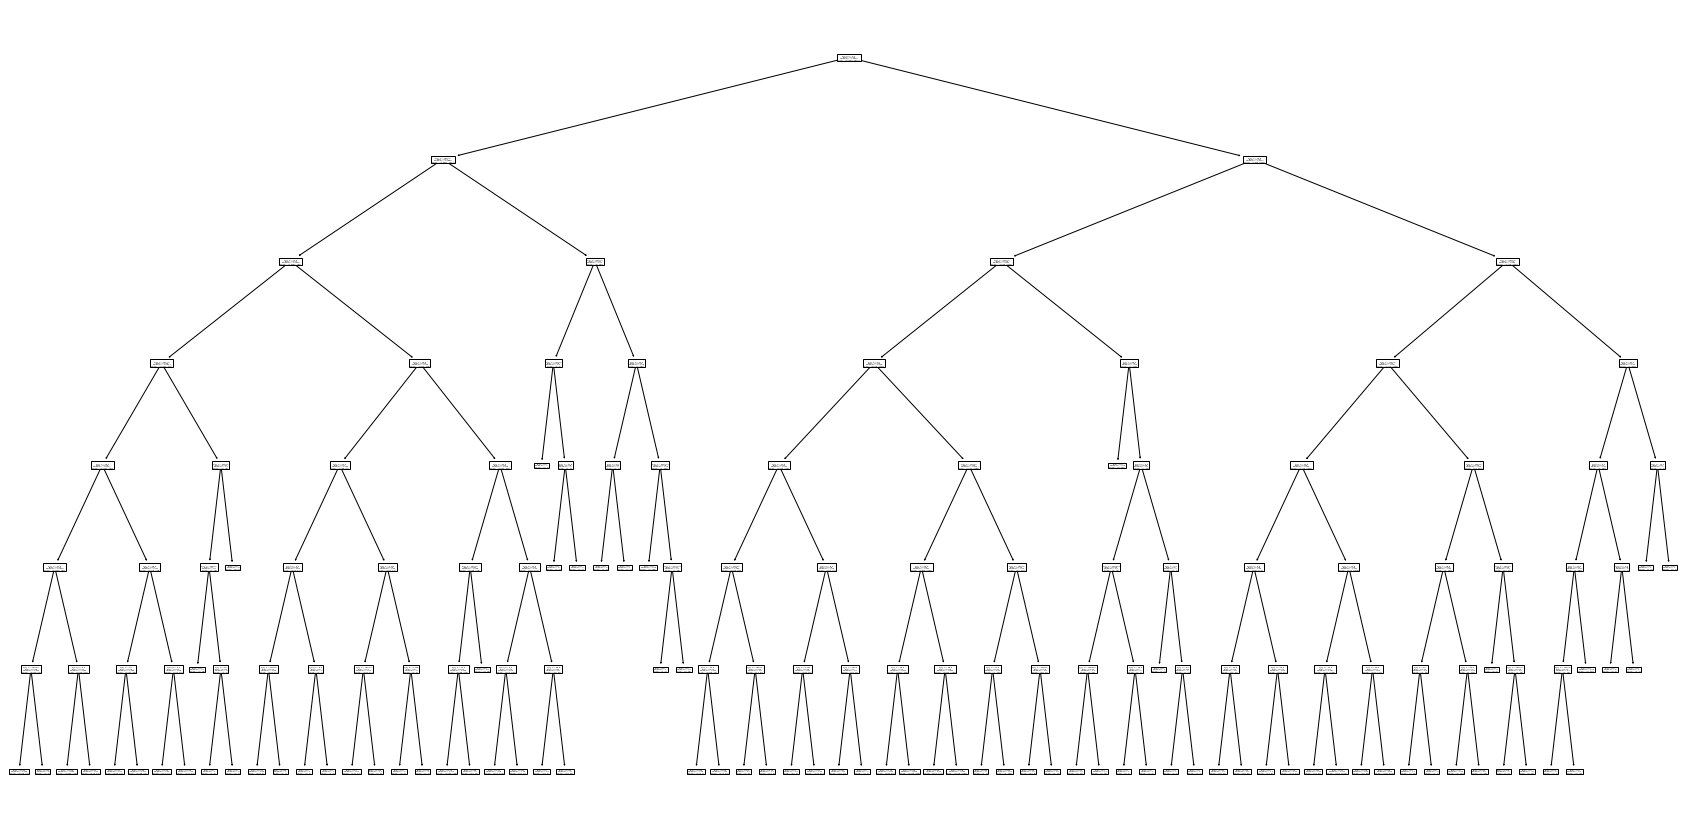

In [148]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15)) # 그래프 크기 설정
plot_tree(model)
plt.show()

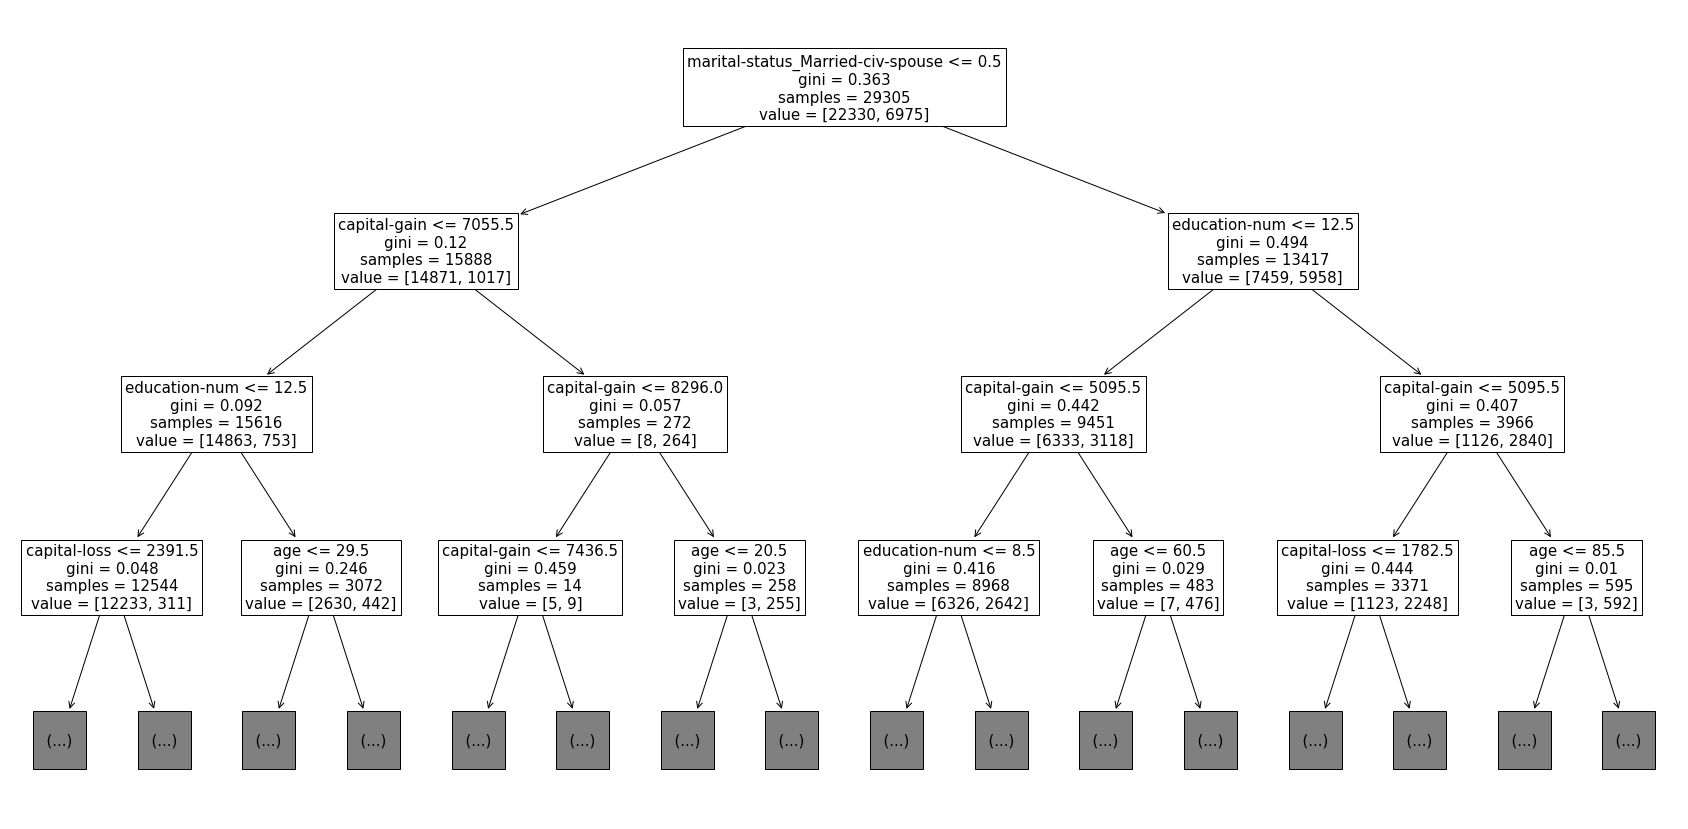

In [149]:
plt.figure(figsize=(30,15))
plot_tree(model, max_depth = 3, fontsize=15, feature_names=X_train.columns)
plt.show()